In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings 
warnings.simplefilter("ignore")

In [4]:
df = pd.read_csv("../artifacts/raw/train.csv")

In [5]:
df.sample(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
2661,INN24347,1,0,0,2,Meal Plan 1,0,Room_Type 1,70,2018,6,3,Offline,0,0,0,90.0,0,Not_Canceled
5924,INN26432,1,0,1,1,Meal Plan 1,0,Room_Type 1,66,2018,4,4,Online,0,0,0,99.9,0,Not_Canceled
4298,INN05940,2,0,2,0,Meal Plan 1,0,Room_Type 4,174,2018,6,5,Online,0,0,0,115.2,0,Canceled
5565,INN07422,2,0,1,2,Not Selected,0,Room_Type 1,51,2018,3,11,Online,0,0,0,76.5,0,Canceled
793,INN02707,2,0,1,2,Meal Plan 1,0,Room_Type 1,20,2018,11,14,Online,0,0,0,104.0,2,Not_Canceled


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7255 entries, 0 to 7254
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            7255 non-null   object 
 1   no_of_adults                          7255 non-null   int64  
 2   no_of_children                        7255 non-null   int64  
 3   no_of_weekend_nights                  7255 non-null   int64  
 4   no_of_week_nights                     7255 non-null   int64  
 5   type_of_meal_plan                     7255 non-null   object 
 6   required_car_parking_space            7255 non-null   int64  
 7   room_type_reserved                    7255 non-null   object 
 8   lead_time                             7255 non-null   int64  
 9   arrival_year                          7255 non-null   int64  
 10  arrival_month                         7255 non-null   int64  
 11  arrival_date     

In [7]:
df.drop(columns=['Booking_ID'],inplace=True)

In [8]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,3,Meal Plan 1,0,Room_Type 1,188,2018,8,26,Online,0,0,0,90.95,0,Canceled
1,1,0,1,4,Not Selected,0,Room_Type 1,20,2018,7,11,Online,0,0,0,139.00,0,Canceled
2,2,0,0,4,Meal Plan 1,0,Room_Type 1,36,2017,10,21,Online,0,0,0,96.30,2,Not_Canceled
3,2,0,0,1,Not Selected,0,Room_Type 1,77,2018,5,7,Online,0,0,0,116.10,1,Not_Canceled
4,1,0,1,1,Meal Plan 1,0,Room_Type 1,32,2018,7,18,Offline,0,0,0,85.00,0,Not_Canceled


In [13]:
num_cols = [col for col in df.columns if df[col].dtype in ['int64','float64']]


In [14]:
num_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [ ]:
cat_cols = [col for col in df.columns if col not in num_cols]

In [23]:
df[cat_cols].dtypes

type_of_meal_plan      object
room_type_reserved     object
market_segment_type    object
booking_status         object
dtype: object

## Univariate Analysis

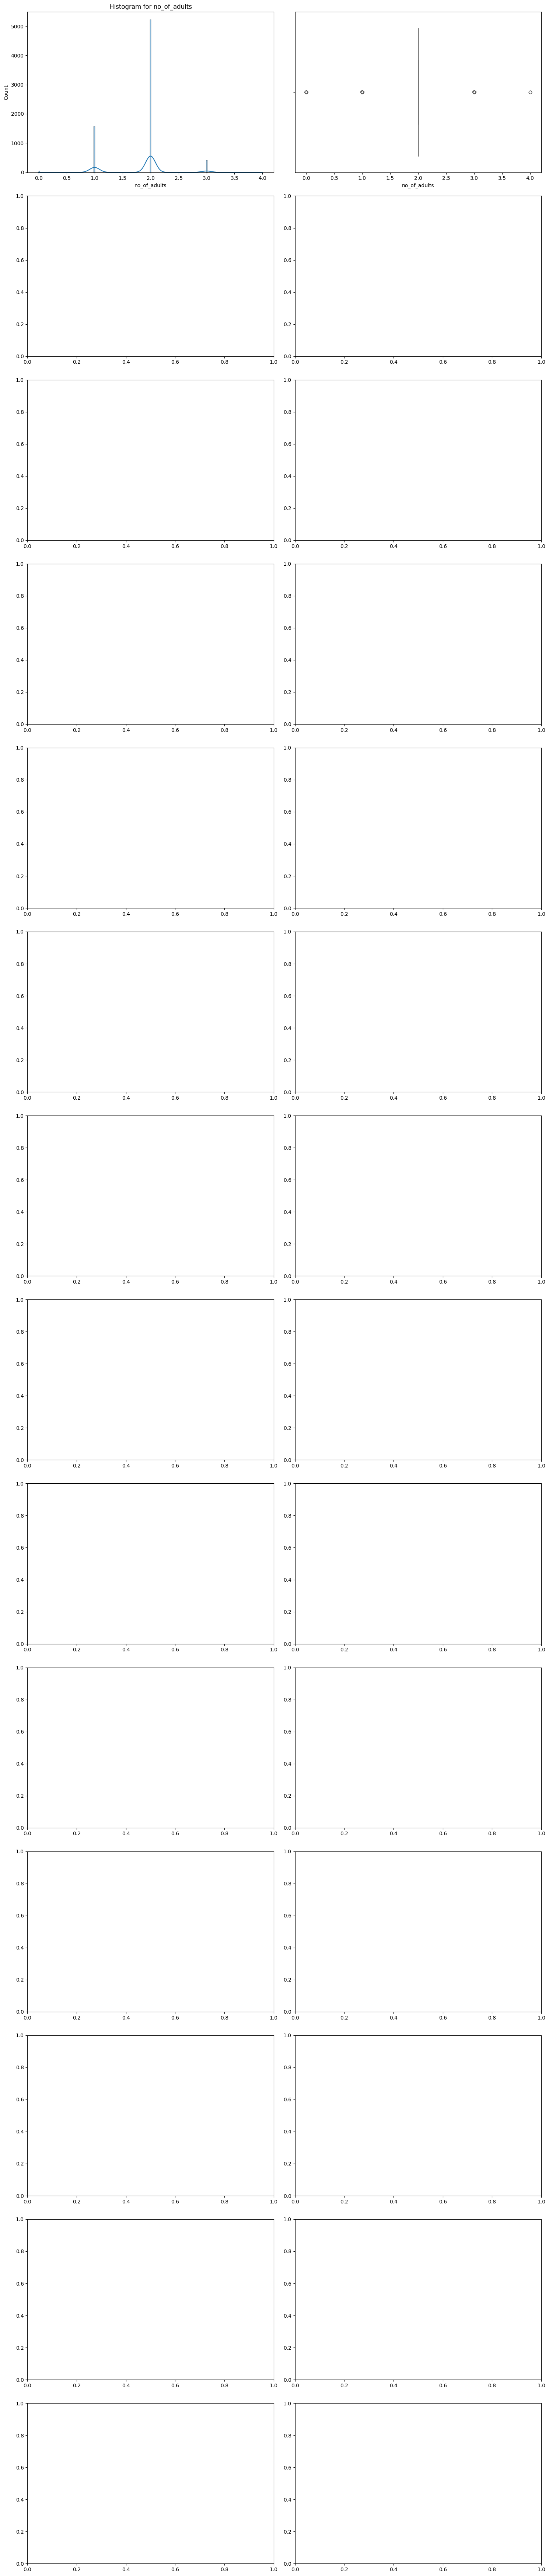

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [24]:
fig,axes = plt.subplots(len(num_cols),2,figsize=(15,len(num_cols)*5))
for i, column in enumerate(num_cols):
    sns.histplot(data=df,x=column,ax=axes[i][0],kde=True,palette='Blues')
    axes[i][0].set_title(f"Histogram for {column}")

    sns.boxplot(data=df,x=column,ax=axes[i][1],palette='Blues')

    plt.tight_layout()
    plt.show()